In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from os import listdir
from os.path import isfile, join
import os
cwd = os.getcwd()
print(cwd)

e:\hydro\smap_hb\cypress_creek


In [9]:
rainfall_list = ["data/fws/rainfall//" + f for f in listdir("data/fws/rainfall") if isfile(join("data/fws/rainfall", f))]
# print(rainfall_list)
 
rainfall = pd.read_excel(rainfall_list[0])
for xls in rainfall_list[1:]:
    xls_file = pd.read_excel(xls)
    rainfall = pd.concat([rainfall, xls_file], axis=0)

rainfall = rainfall.sort_values(by='Reading Date From')
soil_saturation = pd.read_excel("data\\fws\\soil_moisture\\1185 Soil Saturation 2019-31-12.xls")
soil_saturation = soil_saturation.sort_values(by="Reading Date")


['data/fws/rainfall//1185 Rainfall 2019-31-12.xls', 'data/fws/rainfall//1185 Rainfall 2015-31-12.xls', 'data/fws/rainfall//1185 Rainfall 2016-31-12.xls', 'data/fws/rainfall//1185 Rainfall 2017-31-12.xls', 'data/fws/rainfall//1185 Rainfall 2018-31-12.xls']
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34453) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (34367) not 512 + multiple of sector size (512)
WARNING *** file size (19835) not 512 + multiple of sector size (512)


In [ ]:
stage_list = ["data/fws/stage//" + f for f in listdir("data/fws/stage") if isfile(join("data/fws/stage", f))]
print(stage_list)
 
rainfall = pd.read_excel(rainfall_list[0])
for xls in rainfall_list[1:]:
    xls_file = pd.read_excel(xls)
    rainfall = pd.concat([rainfall, xls_file], axis=0)

rainfall = rainfall.sort_values(by='Reading Date From')
soil_saturation = pd.read_excel("data\\fws\\soil_moisture\\1185 Soil Saturation 2019-31-12.xls")
soil_saturation = soil_saturation.sort_values(by="Reading Date")

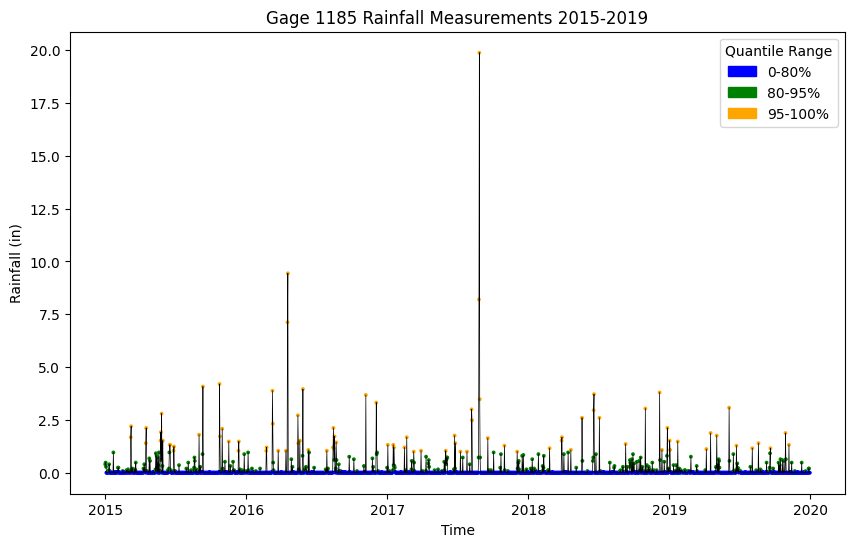

0.00     0.00
0.80     0.04
0.95     0.96
1.00    19.88
Name: Rain, dtype: float64


In [14]:
plt.figure(figsize=(10, 6))
colors = np.array(['blue', 'green', 'orange','red'])
quantiles = pd.qcut(rainfall["Rain"], q=[0,0.8,0.95,1], labels=False)

plt.plot(rainfall["Reading Date From"], rainfall["Rain"], c="black", linewidth=0.5)
plt.scatter(rainfall["Reading Date From"], rainfall["Rain"], c=colors[quantiles], s=3)
# legend
import matplotlib.patches as mpatches
legend_labels = ['0-80%', '80-95%', '95-100%']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(3)]
plt.legend(handles=patches, title="Quantile Range")

# Add title and labels
plt.title("Gage 1185 Rainfall Measurements 2015-2019")
plt.xlabel("Time")
plt.ylabel("Rainfall (in)")
plt.show()

print(rainfall["Rain"].quantile([0,0.8,0.95,1]))



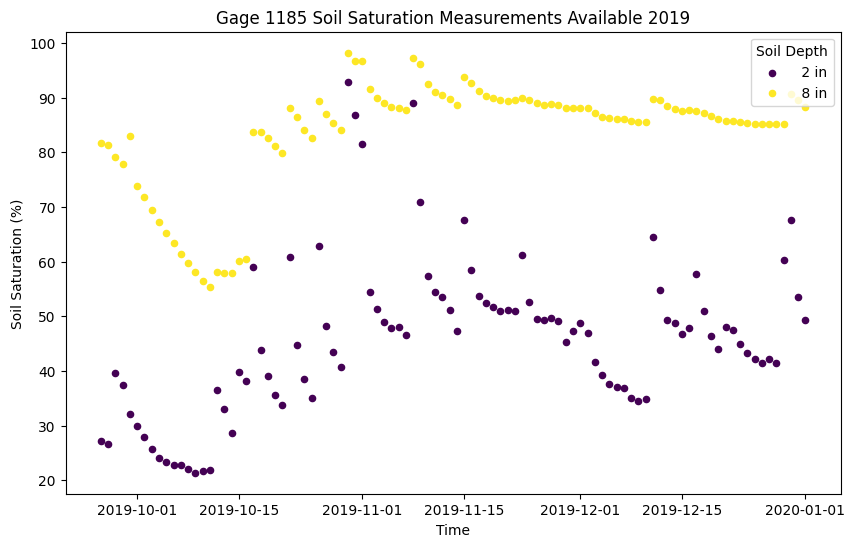

In [15]:
# Get unique soil depth values
unique_depths = soil_saturation["Soil Depth"].unique()

# Define a color for each unique soil depth
colors_soil_sat = plt.cm.viridis(np.linspace(0, 1, len(unique_depths)))

plt.figure(figsize=(10, 6))

# Plot each soil depth with a different color
for i, depth in enumerate(unique_depths):
    subset = soil_saturation[soil_saturation["Soil Depth"] == depth]
    plt.scatter(subset["Reading Date"], subset["Soil Saturation"], color=colors_soil_sat[i], s=20, label=f' {depth} in')

# Create a legend for the soil depths
plt.legend(title="Soil Depth", loc='upper right')

plt.title("Gage 1185 Soil Saturation Measurements Available 2019")
plt.xlabel("Time")
plt.ylabel("Soil Saturation (%)")

plt.show()

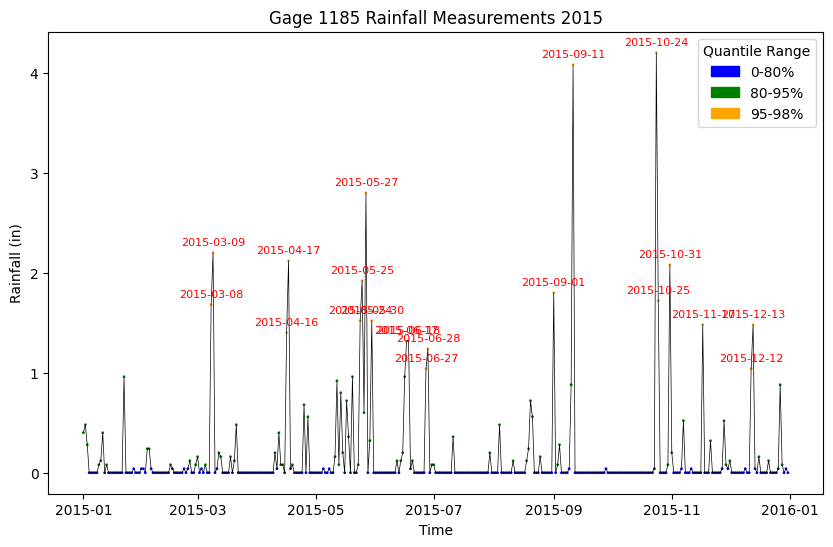

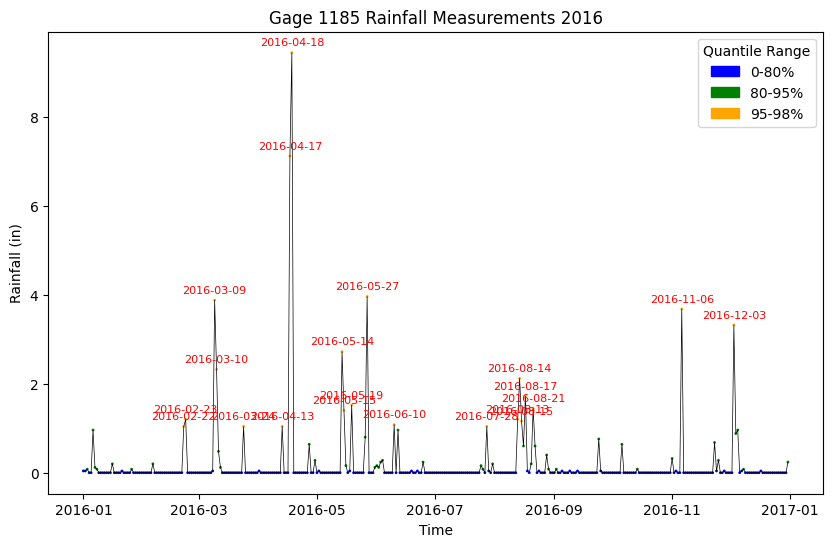

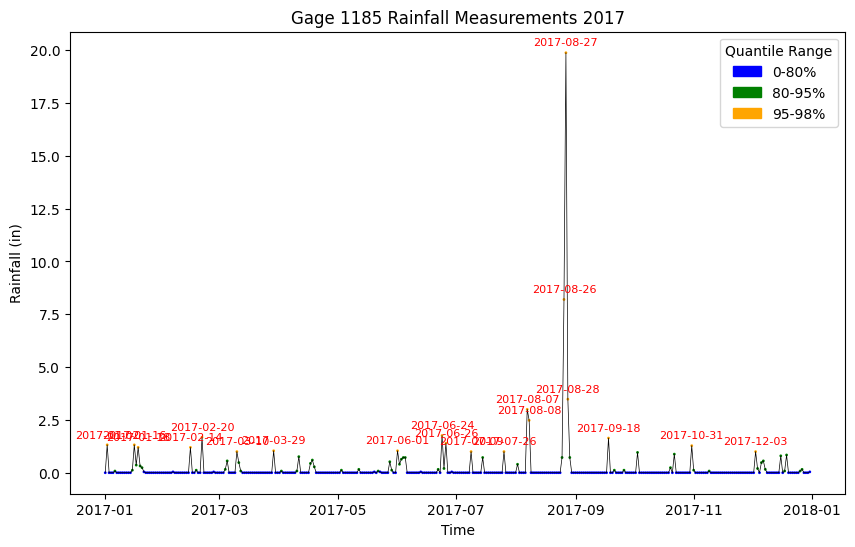

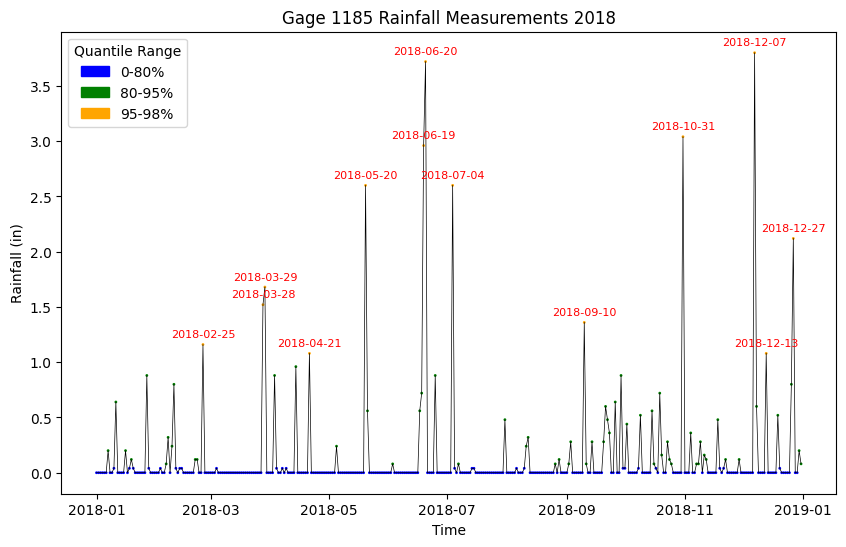

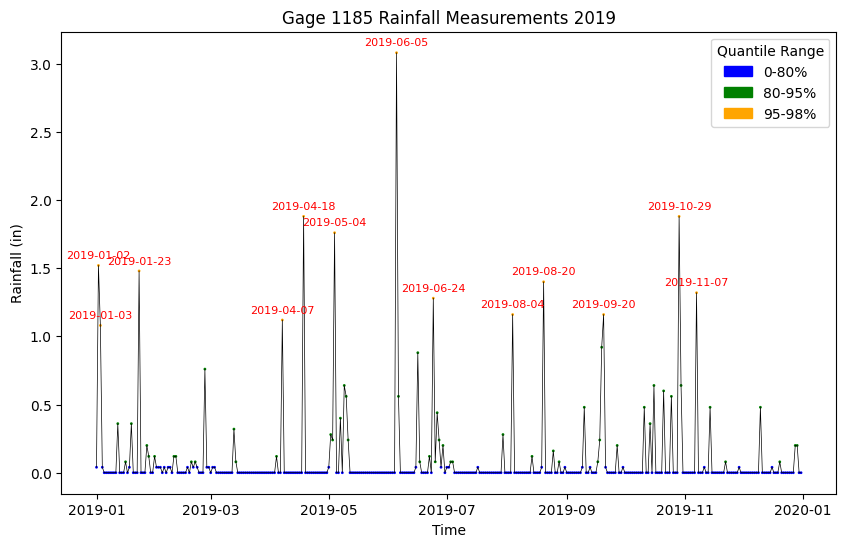

In [16]:
for year in [2015, 2016, 2017, 2018, 2019]:
    rainfall_subset = rainfall[rainfall["Reading Date From"].dt.year == year]
    
    # Identify the dates for the 95%+ quantiles
    high_quantile_dates = rainfall_subset[
        quantiles[rainfall["Reading Date From"].dt.year == year] >= 2
    ]
    
    plt.figure(figsize=(10, 6))
    
    # Plot rainfall data
    plt.plot(rainfall_subset["Reading Date From"], rainfall_subset["Rain"], c="black", linewidth=0.5)
    plt.scatter(rainfall_subset["Reading Date From"], rainfall_subset["Rain"],
                c=colors[quantiles[rainfall["Reading Date From"].dt.year == year]], s=1)
    
    # Add annotations for 95%+ quantile points
    for _, row in high_quantile_dates.iterrows():
        plt.annotate(
            row["Reading Date From"].date(),
            (row["Reading Date From"], row["Rain"]),
            textcoords="offset points",
            xytext=(0,5),  # Adjust the offset for better visibility
            ha='center',
            fontsize=8,
            color='red'
        )
    
    # Create legend for quantiles
    legend_labels = ['0-80%', '80-95%', '95-98%', '98-100%']
    patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(3)]
    plt.legend(handles=patches, title="Quantile Range")
    
    # Add title and labels
    plt.title("Gage 1185 Rainfall Measurements " + str(year))
    plt.xlabel("Time")
    plt.ylabel("Rainfall (in)")
    plt.show()


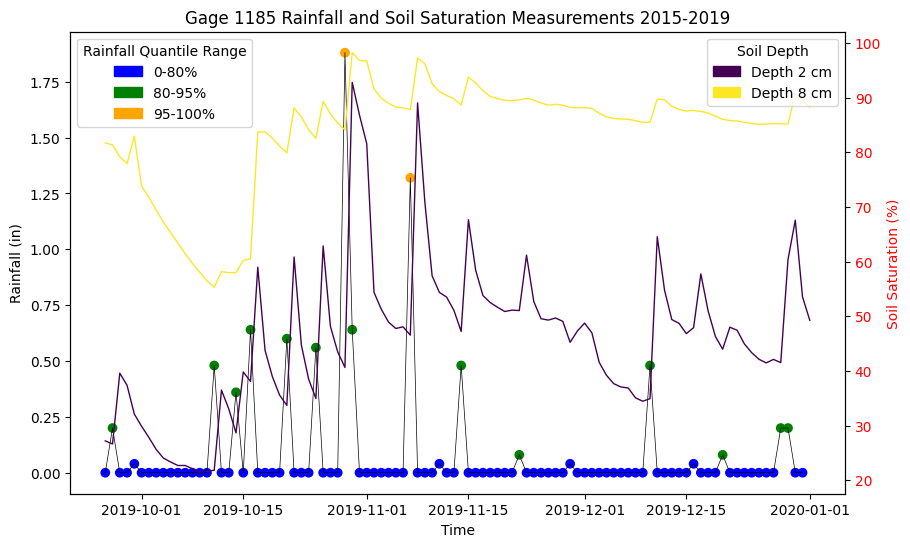

In [97]:
rainfall_subset = rainfall[(rainfall['Reading Date From'] >= soil_saturation['Reading Date'].min()) &
                           (rainfall['Reading Date From'] <= soil_saturation['Reading Date'].max())]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(rainfall_subset["Reading Date From"], rainfall_subset["Rain"], color="black", linewidth=0.5)
ax1.scatter(rainfall_subset["Reading Date From"], rainfall_subset["Rain"], 
            c=colors[quantiles[(rainfall['Reading Date From'] >= soil_saturation['Reading Date'].min()) & 
                               (rainfall['Reading Date From'] <= soil_saturation['Reading Date'].max())]], s=2)

ax1.set_xlabel("Time")
ax1.set_ylabel("Rainfall (in)", color="black")
ax1.tick_params(axis='y', labelcolor="black")

legend_labels = ['0-80%', '80-95%', '95-100%']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(3)]
ax1.legend(handles=patches, title="Rainfall Quantile Range", loc='upper left')

ax2 = ax1.twinx()

unique_depths = soil_saturation['Soil Depth'].unique()

depth_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_depths)))

for i, depth in enumerate(unique_depths):
    subset = soil_saturation[soil_saturation['Soil Depth'] == depth]
    ax2.plot(subset["Reading Date"], subset["Soil Saturation"], color=depth_colors[i], linewidth=1, label=f'Depth {depth} in')

ax2.set_ylabel("Soil Saturation (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

depth_patches = [mpatches.Patch(color=depth_colors[i], label=f'Depth {depth} in') for i, depth in enumerate(unique_depths)]
ax2.legend(handles=depth_patches, title="Soil Depth", loc='upper right')

plt.title("Gage 1185 Rainfall and Soil Saturation Measurements 2015-2019")

plt.show()


[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08
 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.64 1.68 1.72
 1.76 1.8  1.88 1.92 2.08 2.12 2.2  2.32 2.48 2.6  2.72 2.8  2.96 3.
 3.04 3.08 3.32 3.48 3.68 3.72 3.8  3.88 3.96 4.08 4.2  7.12 8.2  9.44]
[0.7490411  0.80876712 0.83890411 0.85863014 0.86794521 0.87890411
 0.88712329 0.89424658 0.89808219 0.90246575 0.90630137 0.90794521
 0.91506849 0.91780822 0.92328767 0.92712329 0.93150685 0.93260274
 0.93753425 0.93917808 0.94191781 0.94246575 0.94739726 0.94849315
 0.95287671 0.95506849 0.95945205 0.96164384 0.96219178 0.96438356
 0.96657534 0.96712329 0.96821918 0.9709589  0.97150685 0.97369863
 0.97424658 0.97589041 0.97863014 0.97917808 0.98082192 0.98191781
 0.9830137  0.98356164 0.98465753 0.98520548 0.98575342 0.98739726
 0.98794521 0.98849315 0.9890411  0.99013699 0.99068493 0.99123288
 0.99178082 0.99232877 0.99287671 0.9934246

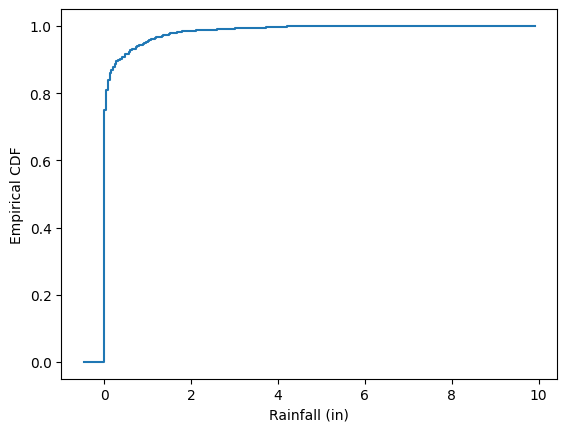

9.44


In [98]:
# look at quantiles of rainfall again
from scipy import stats
res = stats.ecdf(rainfall["Rain"])
print(res.cdf.quantiles)
print(res.cdf.probabilities)

ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Rainfall (in)')
ax.set_ylabel('Empirical CDF')
plt.show()
